### 1. Load and clean the data (handle missing values, encode categorical data, etc.)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df = df.dropna()
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df.shape

(480, 13)

In [8]:
df["Education"].nunique()

2

In [9]:
df["Education"].head()

1        Graduate
2        Graduate
3    Not Graduate
4        Graduate
5        Graduate
Name: Education, dtype: object

In [10]:
df["Married"].nunique()

2

In [11]:
df["Married"].head()

1    Yes
2    Yes
3    Yes
4     No
5    Yes
Name: Married, dtype: object

In [12]:
df["Self_Employed"].nunique()

2

In [13]:
df["Self_Employed"].head()

1     No
2    Yes
3     No
4     No
5    Yes
Name: Self_Employed, dtype: object

In [14]:
df["Property_Area"].nunique()

3

In [15]:
df["Property_Area"]

1          Rural
2          Urban
3          Urban
4          Urban
5          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 480, dtype: object

In [16]:
df["Education"].replace(["Not Graduate", "Graduate"], [0, 1], inplace=True)
df["Married"].replace(["No", "Yes"], [0, 1], inplace=True)
df["Self_Employed"].replace(["No", "Yes"], [0, 1], inplace=True)
df["Gender"].replace(["Male", "Female"], [0, 1], inplace=True)
df["Property_Area"].replace(["Rural", "Urban", "Semiurban"], [0, 1, 2], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17024\3664251973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Education"].replace(["Not Graduate", "Graduate"], [0, 1], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17024\3664251973.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

In [17]:
(df == "3+").any()

Loan_ID              False
Gender               False
Married              False
Dependents            True
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [18]:
df["Dependents"] = df["Dependents"].replace("3+", 3).astype(int)

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y


### 2. Explore the data to understand patterns.


In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y


In [21]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.179167,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.108333
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.822906
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000
75%,0.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000


In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 52.5+ KB


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

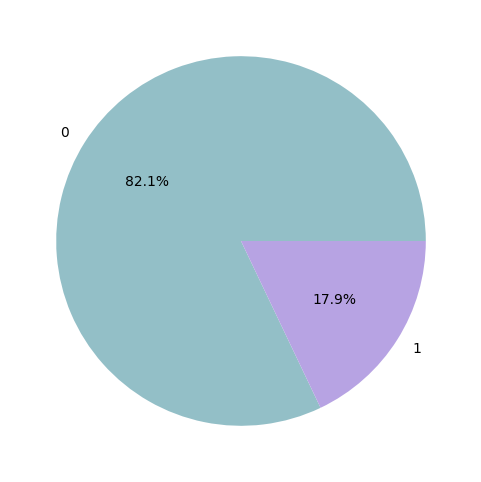

In [25]:
gender  = df["Gender"].value_counts()
colors = ["#93BFC7", "#B7A3E3"]

plt.figure(figsize=(6,6))
plt.pie(gender, labels=gender.index, autopct="%1.1f%%", colors=colors)
plt.show() #0 -> males, 1 -> females

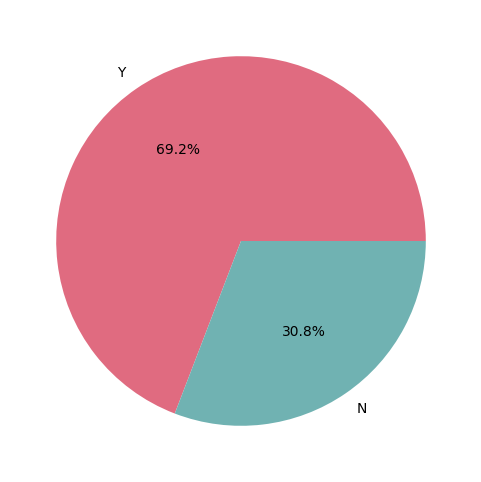

In [26]:
loans  = df["Loan_Status"].value_counts()
colors = ["#E06B80", "#70B2B2"]

plt.figure(figsize=(6,6))
plt.pie(loans, labels=loans.index, autopct="%1.1f%%", colors=colors)
plt.show() 

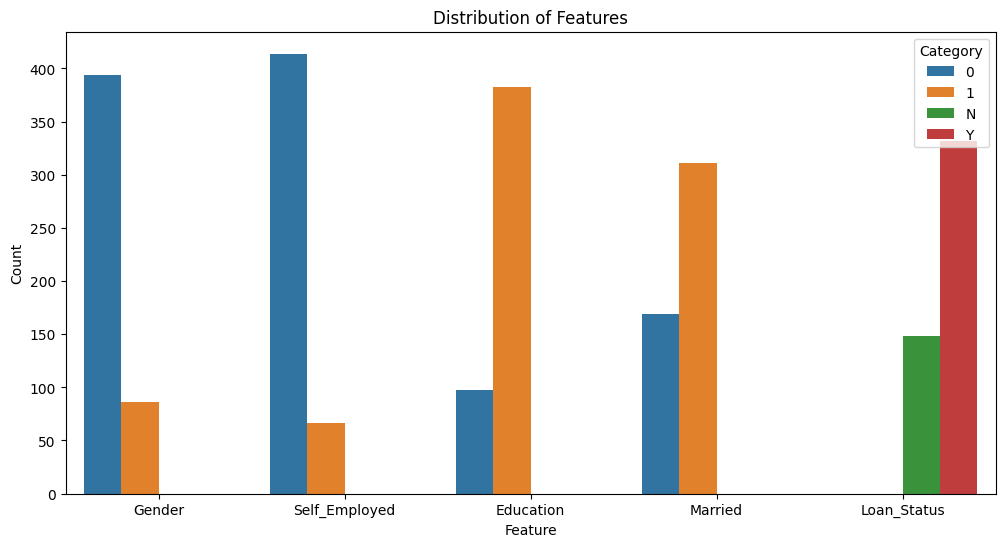

In [27]:
cols = ["Gender", "Self_Employed", "Education", "Married", "Loan_Status"]

df_melted = df[cols].melt(var_name="Feature", value_name="Value")

plt.figure(figsize=(12, 6))
sns.countplot(data=df_melted, x="Feature", hue="Value")
plt.title("Distribution of Features")
plt.ylabel("Count")
plt.xlabel("Feature")
plt.legend(title="Category")
plt.show()

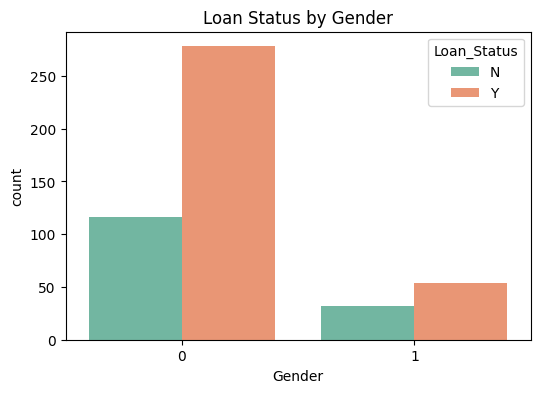

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", hue="Loan_Status", palette="Set2")
plt.title("Loan Status by Gender")
plt.show() #0 -> males, 1 -> females

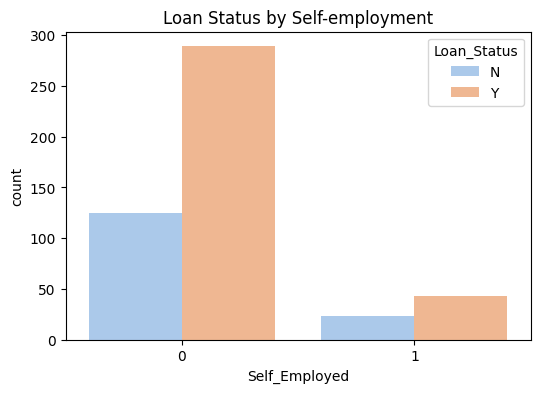

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Self_Employed", hue="Loan_Status", palette="pastel")
plt.title("Loan Status by Self-employment")
plt.show() #0 -> isn't, 1 -> is

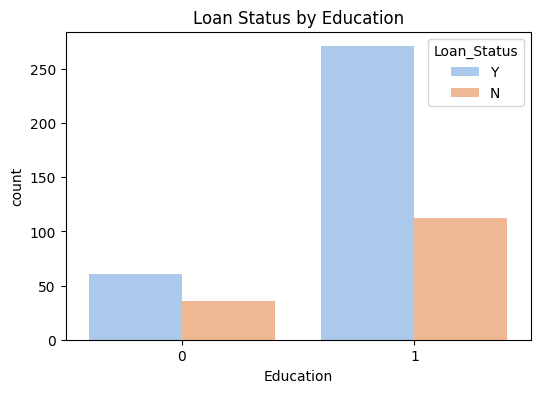

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Education", hue="Loan_Status", palette="pastel")
plt.title("Loan Status by Education")
plt.show() #0 -> without edu, 1 -> with edu

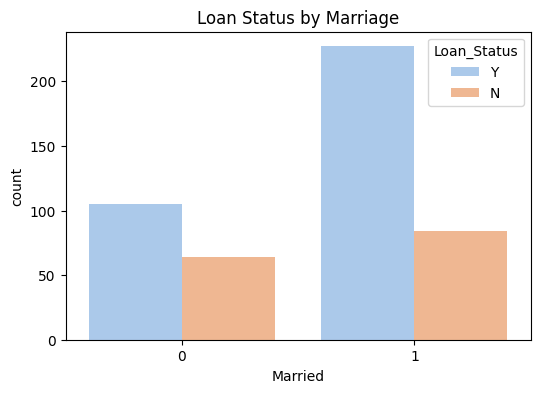

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Married", hue="Loan_Status", palette="pastel")
plt.title("Loan Status by Marriage")
plt.show() #0 -> isn't, 1 -> is

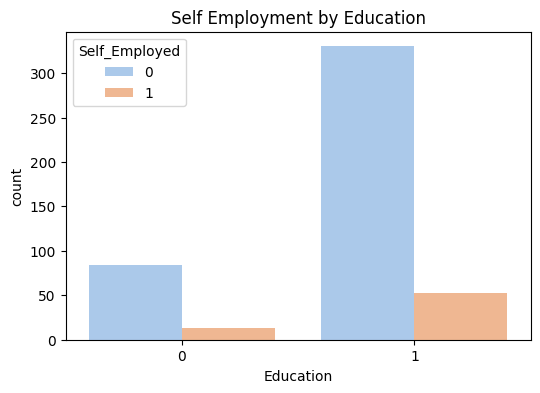

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Education", hue="Self_Employed", palette="pastel")
plt.title("Self Employment by Education")
plt.show() #0 -> isn't, 1 -> is

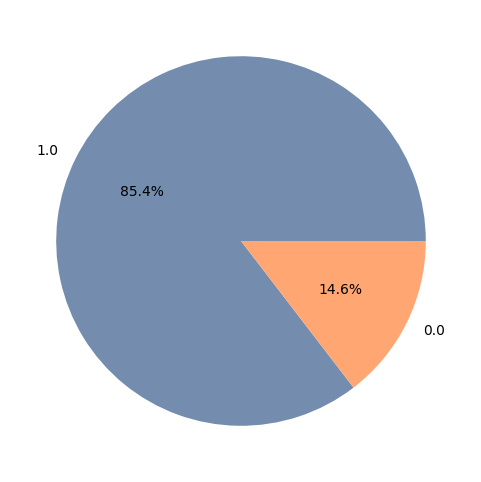

In [33]:
crHis  = df["Credit_History"].value_counts()
colors = ["#748DAE", "#FFA673"]

plt.figure(figsize=(6,6))
plt.pie(crHis, labels=crHis.index, autopct="%1.1f%%", colors=colors)
plt.show() #1 -> has, 0 -> doesn't have

### 3. Train classification models to predict Loan_Status. Evaluate the model using accuracy, confusion matrix, F1 score, etc.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
X = df.drop(columns=["Loan_ID","Loan_Status"])
y = df["Loan_Status"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

LightGBM yükliyə bilmədim, problem çıxır :(

#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_train_pr_lr = lr.predict(X_train_scaled)
y_test_pr_lr = lr.predict(X_test_scaled)

In [41]:
print("Test:\n", classification_report(y_test, y_test_pr_lr))
print("Train:\n", classification_report(y_train, y_train_pr_lr))

Test:
               precision    recall  f1-score   support

           N       1.00      0.43      0.60        30
           Y       0.80      1.00      0.89        66

    accuracy                           0.82        96
   macro avg       0.90      0.72      0.75        96
weighted avg       0.86      0.82      0.80        96

Train:
               precision    recall  f1-score   support

           N       0.86      0.47      0.60       118
           Y       0.80      0.97      0.88       266

    accuracy                           0.81       384
   macro avg       0.83      0.72      0.74       384
weighted avg       0.82      0.81      0.79       384



In [42]:
print("Test:\n", confusion_matrix(y_test, y_test_pr_lr))
print("Train:\n", confusion_matrix(y_train, y_train_pr_lr))

Test:
 [[13 17]
 [ 0 66]]
Train:
 [[ 55  63]
 [  9 257]]


#### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_train_dt = dt_clf.predict(X_train)
y_pred_test_dt = dt_clf.predict(X_test)

In [45]:
print("Training set classification report:\n", classification_report(y_train, y_pred_train_dt))
print("\nTesting set classification report:\n", classification_report(y_test, y_pred_test_dt))

Training set classification report:
               precision    recall  f1-score   support

           N       0.87      0.49      0.63       118
           Y       0.81      0.97      0.88       266

    accuracy                           0.82       384
   macro avg       0.84      0.73      0.75       384
weighted avg       0.83      0.82      0.80       384


Testing set classification report:
               precision    recall  f1-score   support

           N       0.87      0.43      0.58        30
           Y       0.79      0.97      0.87        66

    accuracy                           0.80        96
   macro avg       0.83      0.70      0.72        96
weighted avg       0.81      0.80      0.78        96



In [46]:
print("Training set confusion matrix:\n", confusion_matrix(y_train, y_pred_train_dt))
print("Testing set confusion matrix:\n", confusion_matrix(y_test, y_pred_test_dt))

Training set confusion matrix:
 [[ 58  60]
 [  9 257]]
Testing set confusion matrix:
 [[13 17]
 [ 2 64]]


#### Random Forest


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_pred_train_rf = rf_clf.predict(X_train)
y_pred_test_rf = rf_clf.predict(X_test)

In [49]:
print("Train set classification report:\n", classification_report(y_train, y_pred_train_rf))
print("Test set classification report:\n", classification_report(y_test, y_pred_test_rf))

Train set classification report:
               precision    recall  f1-score   support

           N       1.00      1.00      1.00       118
           Y       1.00      1.00      1.00       266

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384

Test set classification report:
               precision    recall  f1-score   support

           N       0.75      0.50      0.60        30
           Y       0.80      0.92      0.86        66

    accuracy                           0.79        96
   macro avg       0.78      0.71      0.73        96
weighted avg       0.79      0.79      0.78        96



In [50]:
print("Train set confusion matrix:\n", confusion_matrix(y_train, y_pred_train_rf))
print("Test set confusion matrix:\n", confusion_matrix(y_test, y_pred_test_rf))

Train set confusion matrix:
 [[118   0]
 [  0 266]]
Test set confusion matrix:
 [[15 15]
 [ 5 61]]


#### KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform", metric="minkowski", p=2)
knn.fit(X_train_scaled, y_train)
y_train_pr_knn = knn.predict(X_train_scaled)
y_test_pr_knn = knn.predict(X_test_scaled)

In [53]:
print("Classification report (test):\n", classification_report(y_test, y_test_pr_knn))
print("Classification report (train):\n", classification_report(y_train, y_train_pr_knn))

Classification report (test):
               precision    recall  f1-score   support

           N       0.71      0.40      0.51        30
           Y       0.77      0.92      0.84        66

    accuracy                           0.76        96
   macro avg       0.74      0.66      0.68        96
weighted avg       0.75      0.76      0.74        96

Classification report (train):
               precision    recall  f1-score   support

           N       0.88      0.51      0.65       118
           Y       0.82      0.97      0.89       266

    accuracy                           0.83       384
   macro avg       0.85      0.74      0.77       384
weighted avg       0.84      0.83      0.81       384



In [54]:
print("Confusion matrix (test):\n", confusion_matrix(y_test, y_test_pr_knn))
print("Confusion matrix (train):\n", confusion_matrix(y_train, y_train_pr_knn))

Confusion matrix (test):
 [[12 18]
 [ 5 61]]
Confusion matrix (train):
 [[ 60  58]
 [  8 258]]


#### SVM


In [55]:
from sklearn.svm import SVC

In [56]:
svc = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svc.fit(X_train_scaled, y_train)
y_train_svc = svc.predict(X_train_scaled)
y_test_svc = svc.predict(X_test_scaled)

In [57]:
print("Classification report (test):\n", classification_report(y_test, y_test_svc))
print("\nClassification report (train):\n", classification_report(y_train, y_train_svc))

Classification report (test):
               precision    recall  f1-score   support

           N       0.88      0.47      0.61        30
           Y       0.80      0.97      0.88        66

    accuracy                           0.81        96
   macro avg       0.84      0.72      0.74        96
weighted avg       0.82      0.81      0.79        96


Classification report (train):
               precision    recall  f1-score   support

           N       0.92      0.50      0.65       118
           Y       0.82      0.98      0.89       266

    accuracy                           0.83       384
   macro avg       0.87      0.74      0.77       384
weighted avg       0.85      0.83      0.82       384



In [58]:
print("Confusion matrix (test):\n", confusion_matrix(y_test, y_test_svc))
print("\nConfusion matrix (train):\n", confusion_matrix(y_train, y_train_svc))

Confusion matrix (test):
 [[14 16]
 [ 2 64]]

Confusion matrix (train):
 [[ 59  59]
 [  5 261]]


#### Naive Bayes


In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_train_nb = nb_clf.predict(X_train)
y_pred_test_nb = nb_clf.predict(X_test)

In [61]:
print("Classification Report (Train Set):\n", classification_report(y_train, y_pred_train_nb))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test_nb))

Classification Report (Train Set):
               precision    recall  f1-score   support

           N       0.76      0.48      0.59       118
           Y       0.80      0.93      0.86       266

    accuracy                           0.79       384
   macro avg       0.78      0.71      0.73       384
weighted avg       0.79      0.79      0.78       384


Classification Report (Test Set):
               precision    recall  f1-score   support

           N       0.83      0.50      0.62        30
           Y       0.81      0.95      0.88        66

    accuracy                           0.81        96
   macro avg       0.82      0.73      0.75        96
weighted avg       0.82      0.81      0.80        96



In [62]:
print("Confusion Matrix (Train Set):\n", confusion_matrix(y_train, y_pred_train_nb))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred_test_nb))

Confusion Matrix (Train Set):
 [[ 57  61]
 [ 18 248]]
Confusion Matrix (Test Set):
 [[15 15]
 [ 3 63]]


#### Voting Classifier


In [63]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

In [64]:
svc2 = SVC(probability=True, random_state=42)

lr_pipe = Pipeline([("scaler", StandardScaler()), ("lr", lr)])
svc_pipe = Pipeline([("scaler", StandardScaler()), ("svc", svc2)])
nb_pipe = Pipeline([("scaler", StandardScaler()), ("nb", nb_clf)])

voting_clf = VotingClassifier(
    estimators=[('log', lr_pipe), ('svm', svc_pipe), ('nb', nb_pipe)],
    voting='soft',
    weights=[1,3,1]
)
voting_clf.fit(X_train, y_train)
y_pred_train_vc = voting_clf.predict(X_train)
y_pred_test_vc = voting_clf.predict(X_test)

In [65]:
print("Classification Report (Train Set):\n", classification_report(y_train, y_pred_train_vc))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test_vc))

Classification Report (Train Set):
               precision    recall  f1-score   support

           N       0.91      0.49      0.64       118
           Y       0.81      0.98      0.89       266

    accuracy                           0.83       384
   macro avg       0.86      0.73      0.76       384
weighted avg       0.84      0.83      0.81       384


Classification Report (Test Set):
               precision    recall  f1-score   support

           N       0.88      0.47      0.61        30
           Y       0.80      0.97      0.88        66

    accuracy                           0.81        96
   macro avg       0.84      0.72      0.74        96
weighted avg       0.82      0.81      0.79        96



In [66]:
print("Confusion Matrix (Train Set):\n", confusion_matrix(y_train, y_pred_train_vc))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred_test_vc))

Confusion Matrix (Train Set):
 [[ 58  60]
 [  6 260]]
Confusion Matrix (Test Set):
 [[14 16]
 [ 2 64]]


#### Bagging Classifier


In [67]:
from sklearn.ensemble import BaggingClassifier 

In [68]:
bagging = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42).fit(X_train_scaled, y_train)
y_pred_train_bc = bagging.predict(X_train_scaled)
y_pred_test_bc = bagging.predict(X_test_scaled)

In [69]:
print("Classification Report (Train Set):\n", classification_report(y_train, y_pred_train_bc))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test_bc))

Classification Report (Train Set):
               precision    recall  f1-score   support

           N       0.85      0.44      0.58       118
           Y       0.80      0.97      0.87       266

    accuracy                           0.80       384
   macro avg       0.82      0.70      0.73       384
weighted avg       0.81      0.80      0.78       384


Classification Report (Test Set):
               precision    recall  f1-score   support

           N       0.93      0.43      0.59        30
           Y       0.79      0.98      0.88        66

    accuracy                           0.81        96
   macro avg       0.86      0.71      0.73        96
weighted avg       0.84      0.81      0.79        96



In [70]:
print("Confusion Matrix (Train Set):\n", confusion_matrix(y_train, y_pred_train_vc))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred_test_vc))

Confusion Matrix (Train Set):
 [[ 58  60]
 [  6 260]]
Confusion Matrix (Test Set):
 [[14 16]
 [ 2 64]]


#### Gradient Boosting


In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gbClass = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
y_pred_train_gb = gbClass.predict(X_train)
y_pred_test_gb = gbClass.predict(X_test)

In [73]:
print("Classification Report (Train Set):\n", classification_report(y_train, y_pred_train_gb))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test_gb))

Classification Report (Train Set):
               precision    recall  f1-score   support

           N       0.92      0.68      0.78       118
           Y       0.87      0.97      0.92       266

    accuracy                           0.88       384
   macro avg       0.90      0.83      0.85       384
weighted avg       0.89      0.88      0.88       384


Classification Report (Test Set):
               precision    recall  f1-score   support

           N       0.68      0.50      0.58        30
           Y       0.80      0.89      0.84        66

    accuracy                           0.77        96
   macro avg       0.74      0.70      0.71        96
weighted avg       0.76      0.77      0.76        96



In [74]:
print("Confusion Matrix (Train Set):\n", confusion_matrix(y_train, y_pred_train_gb))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred_test_gb))

Confusion Matrix (Train Set):
 [[ 80  38]
 [  7 259]]
Confusion Matrix (Test Set):
 [[15 15]
 [ 7 59]]


#### XGBoost


In [75]:
df2 = df.copy()
df2["Loan_Status"].replace(["N", "Y"], [0, 1], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17024\1898675149.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["Loan_Status"].replace(["N", "Y"], [0, 1], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17024\1898675149.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["Loan_S

In [76]:
y2 = df2["Loan_Status"]

In [77]:
X_train, X_test, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, stratify=y, random_state=0)

In [78]:
from xgboost import XGBClassifier

In [79]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
).fit(X_train, y_train2)
ypred_train = xgb.predict(X_train)
ypred_test = xgb.predict(X_test)

In [80]:
print("Classification Report (Train Set):\n", classification_report(y_train2, ypred_train))
print("\nClassification Report (Test Set):\n", classification_report(y_test2, ypred_test))

Classification Report (Train Set):
               precision    recall  f1-score   support

           0       0.98      0.81      0.89       118
           1       0.92      0.99      0.96       266

    accuracy                           0.94       384
   macro avg       0.95      0.90      0.92       384
weighted avg       0.94      0.94      0.94       384


Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.75      0.50      0.60        30
           1       0.80      0.92      0.86        66

    accuracy                           0.79        96
   macro avg       0.78      0.71      0.73        96
weighted avg       0.79      0.79      0.78        96



In [81]:
print("Confusion Matrix (Train Set):\n", confusion_matrix(y_train2, ypred_train))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test2, ypred_test))

Confusion Matrix (Train Set):
 [[ 96  22]
 [  2 264]]
Confusion Matrix (Test Set):
 [[15 15]
 [ 5 61]]


#### CatBoost


In [82]:
from catboost import CatBoostClassifier

In [83]:
catBoost = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    loss_function="Logloss",
    eval_metric="Accuracy",
    random_seed=42,
    verbose=False
).fit(X_train, y_train)
ypred_train_cb = catBoost.predict(X_train)
ypred_test_cb = catBoost.predict(X_test)

In [84]:
print("Classification Report (Train Set):\n", classification_report(y_train, ypred_train_cb))
print("\nClassification Report (Test Set):\n", classification_report(y_test, ypred_test_cb))

Classification Report (Train Set):
               precision    recall  f1-score   support

           N       1.00      1.00      1.00       118
           Y       1.00      1.00      1.00       266

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384


Classification Report (Test Set):
               precision    recall  f1-score   support

           N       0.84      0.53      0.65        30
           Y       0.82      0.95      0.88        66

    accuracy                           0.82        96
   macro avg       0.83      0.74      0.77        96
weighted avg       0.83      0.82      0.81        96



In [85]:
print("Confusion Matrix (Train Set):\n", confusion_matrix(y_train2, ypred_train))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test2, ypred_test))

Confusion Matrix (Train Set):
 [[ 96  22]
 [  2 264]]
Confusion Matrix (Test Set):
 [[15 15]
 [ 5 61]]


#### Stacking Classifier

In [86]:
from sklearn.ensemble import StackingClassifier 

In [87]:
estimators = [('svc', svc), ('dtCl', dt_clf)]
stCLass = StackingClassifier(estimators=estimators, final_estimator=lr).fit(X_train_scaled, y_train)
y_pred_train_st = stCLass.predict(X_train_scaled)
y_pred_test_st = stCLass.predict(X_test_scaled)

In [88]:
print("Classification Report (Train Set):\n", classification_report(y_train, y_pred_train_st))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test_st))

Classification Report (Train Set):
               precision    recall  f1-score   support

           N       0.91      0.51      0.65       118
           Y       0.82      0.98      0.89       266

    accuracy                           0.83       384
   macro avg       0.86      0.74      0.77       384
weighted avg       0.85      0.83      0.82       384


Classification Report (Test Set):
               precision    recall  f1-score   support

           N       0.82      0.47      0.60        30
           Y       0.80      0.95      0.87        66

    accuracy                           0.80        96
   macro avg       0.81      0.71      0.73        96
weighted avg       0.81      0.80      0.78        96



In [89]:
print("Confusion Matrix (Train Set):\n", confusion_matrix(y_train, y_pred_train_st))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred_test_st))

Confusion Matrix (Train Set):
 [[ 60  58]
 [  6 260]]
Confusion Matrix (Test Set):
 [[14 16]
 [ 3 63]]


### 4. Choose the best performing model for loan prediction.

In [92]:
summary = pd.DataFrame({
    "Models": ["Logistic Regression", "Decision Tree", "Random Forest", "KNN", "SVM", "Naive Bayes", "Voting Classifier",
               "Bagging Classifier", "Gradient Boosting", "XGBoost", "CatBoost", "Stacking CLasifier"],
    "Train accuracy": [
        accuracy_score(y_train, y_train_pr_lr),
        accuracy_score(y_train, y_pred_train_dt),
        accuracy_score(y_train, y_pred_train_rf),
        accuracy_score(y_train, y_train_pr_knn),
        accuracy_score(y_train, y_train_svc),
        accuracy_score(y_train, y_pred_train_nb),
        accuracy_score(y_train, y_pred_train_vc),
        accuracy_score(y_train, y_pred_train_bc),
        accuracy_score(y_train, y_pred_train_gb),
        accuracy_score(y_train2, ypred_train),
        accuracy_score(y_train, ypred_train_cb),
        accuracy_score(y_train, y_pred_train_st)
    ],
    "Test accuracy": [
        accuracy_score(y_test, y_test_pr_lr),
        accuracy_score(y_test, y_pred_test_dt),
        accuracy_score(y_test, y_pred_test_rf),
        accuracy_score(y_test, y_test_pr_knn),
        accuracy_score(y_test, y_test_svc),
        accuracy_score(y_test, y_pred_test_nb),
        accuracy_score(y_test, y_pred_test_vc),
        accuracy_score(y_test, y_pred_test_bc),
        accuracy_score(y_test, y_pred_test_gb),
        accuracy_score(y_test2, ypred_test),
        accuracy_score(y_test, ypred_test_cb),
        accuracy_score(y_test, y_pred_test_st)
    ]
})

print(summary)

                 Models  Train accuracy  Test accuracy
0   Logistic Regression        0.812500       0.822917
1         Decision Tree        0.820312       0.802083
2         Random Forest        1.000000       0.791667
3                   KNN        0.828125       0.760417
4                   SVM        0.833333       0.812500
5           Naive Bayes        0.794271       0.812500
6     Voting Classifier        0.828125       0.812500
7    Bagging Classifier        0.804688       0.812500
8     Gradient Boosting        0.882812       0.770833
9               XGBoost        0.937500       0.791667
10             CatBoost        1.000000       0.822917
11   Stacking CLasifier        0.833333       0.802083


the best algorithms:
1. voting classifier
2. bagging classifier
3. logistic regression
4. svm
5. decision tree
6. stacking classifier